# Problem statement - Concrete Strength Prediction

# Objective

Concrete is the most important material in civil engineering. The concrete compressive strength is highly non linear function of age and ingredients. These ingredients includes Cement,blast furnace slag, fly ash, water, super plastisizers, coarse aggregate and fine aggregates

## Importing the dataset

In [1]:
# importing Libraries
import pandas as pd   ## data Preprocessing
import numpy as np    ## mathematical calculations
import matplotlib.pyplot as plt # data visualization
import seaborn as sns    # data vosualization
df=pd.read_csv('Concrete_Data_Yeh.csv')

In [2]:
df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
# Check for missing values in the dataset
print(df.isnull().sum())

cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64


there are no missing or null values in dataset so no need to handle

In [4]:
for col in df.columns:
    if(df[col].any()):
        print(col, df[col].unique())

cement [540.  332.5 198.6 266.  380.  475.  427.5 190.  304.  139.6 342.  237.5
 349.  310.  485.  374.  313.3 425.  375.  469.  388.6 531.3 318.8 401.8
 362.6 323.7 379.5 286.3 439.  389.9 337.9 222.4 233.8 194.7 190.7 212.1
 230.  190.3 166.1 168.  213.7 213.8 229.7 238.1 250.  212.5 212.6 212.
 231.8 251.4 181.4 182.  168.9 290.4 277.1 295.7 251.8 249.1 252.3 246.8
 275.1 297.2 213.5 277.2 218.2 214.9 218.9 376.  500.  315.  505.  451.
 516.  520.  528.  385.  500.1 450.1 397.  333.  334.  405.  200.  145.
 160.  234.  285.  356.  275.  165.  178.  167.4 172.4 173.5 167.  173.8
 446.  387.  355.  491.  424.  202.  284.  359.  436.  289.  393.  480.
 255.  158.8 239.6 238.2 181.9 193.5 255.5 272.8 220.8 382.5 210.7 295.8
 203.5 381.4 228.  316.1 135.7 339.2 290.2 170.3 186.2 252.5 339.  236.
 277.  254.  307.  225.  325.  300.  400.  350.  250.2 157.  141.3 166.8
 122.6 183.9 102.  108.3 305.3 116.  133.  173.  192.  153.  288.  331.
 238.  296.  297.  281.  382.  295.  302.  525.  2

In [5]:
# Checking dataset size
df.shape

(1030, 9)

In [6]:
print(df.dtypes)

cement              float64
slag                float64
flyash              float64
water               float64
superplasticizer    float64
coarseaggregate     float64
fineaggregate       float64
age                   int64
csMPa               float64
dtype: object


Based on the information provided in the dataset, all the columns are numerical variables

In [7]:
df.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


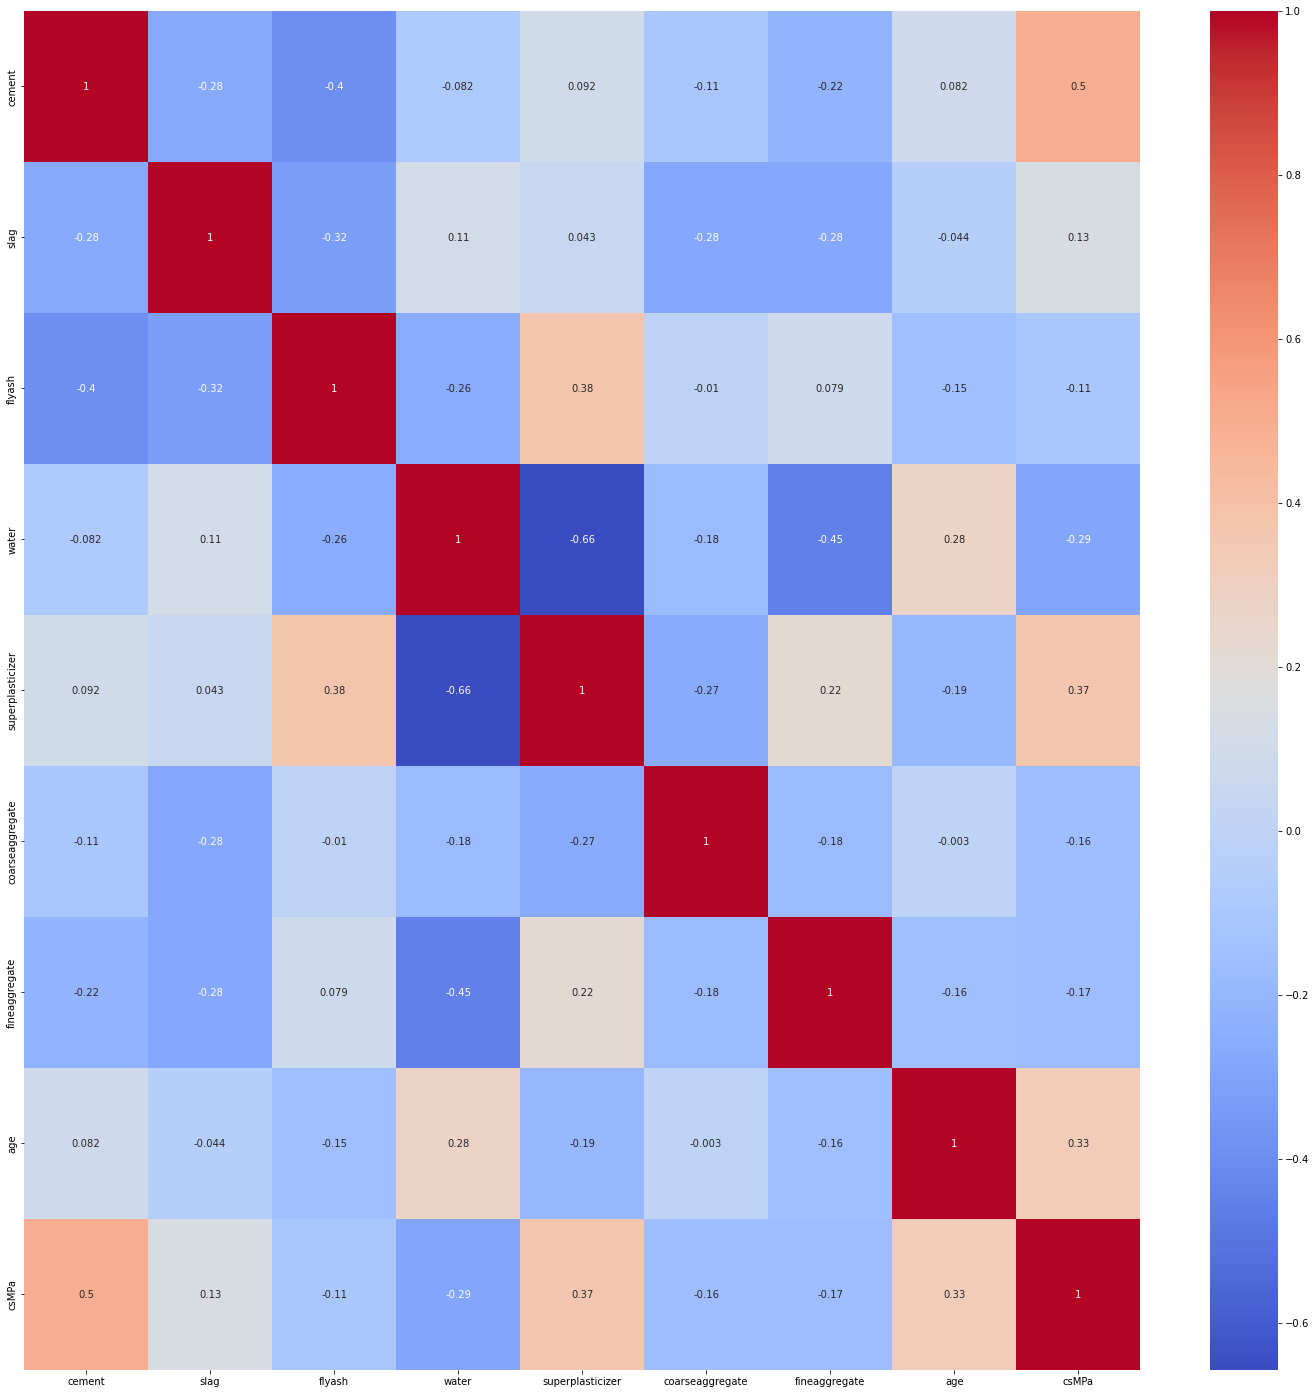

In [8]:
# lets check correlation of variables with each other
# correlation heatmap
plt.figure(figsize=(25,25))
cor = sns.heatmap(df.corr(),cmap = 'coolwarm',annot = True)

all the variables have less than 60% correlation with each other


all the variables have more than 11% correlation with output variable i.e. compressive strength

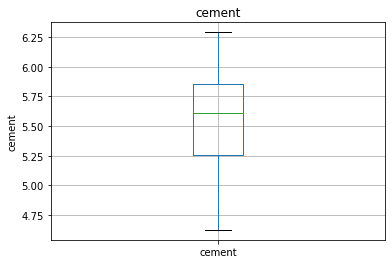

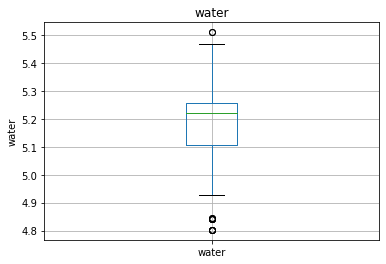

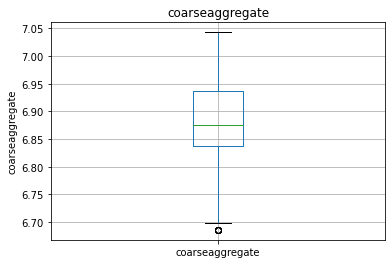

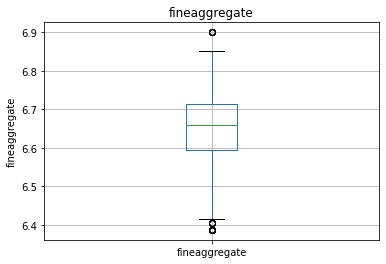

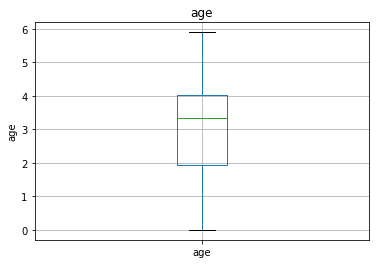

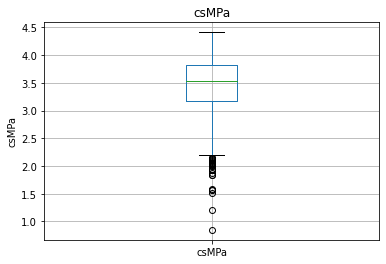

In [9]:
#checking for outliers
for feature in df.columns:
    data = df.copy()
    if 0 in data[feature].unique():   # log 0 is not defined
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()
    
        

In [10]:
# removing outliers
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
IQR = q3-q1
print(IQR)

cement              157.625
slag                142.950
flyash              118.300
water                27.100
superplasticizer     10.200
coarseaggregate      97.400
fineaggregate        93.050
age                  49.000
csMPa                22.425
dtype: float64


In [11]:
df = df[~((df < (q1 - 1.5*IQR)) | (df > (q3 + 1.5*IQR))).any(axis=1)]
df.shape

(941, 9)

# Data Visualization

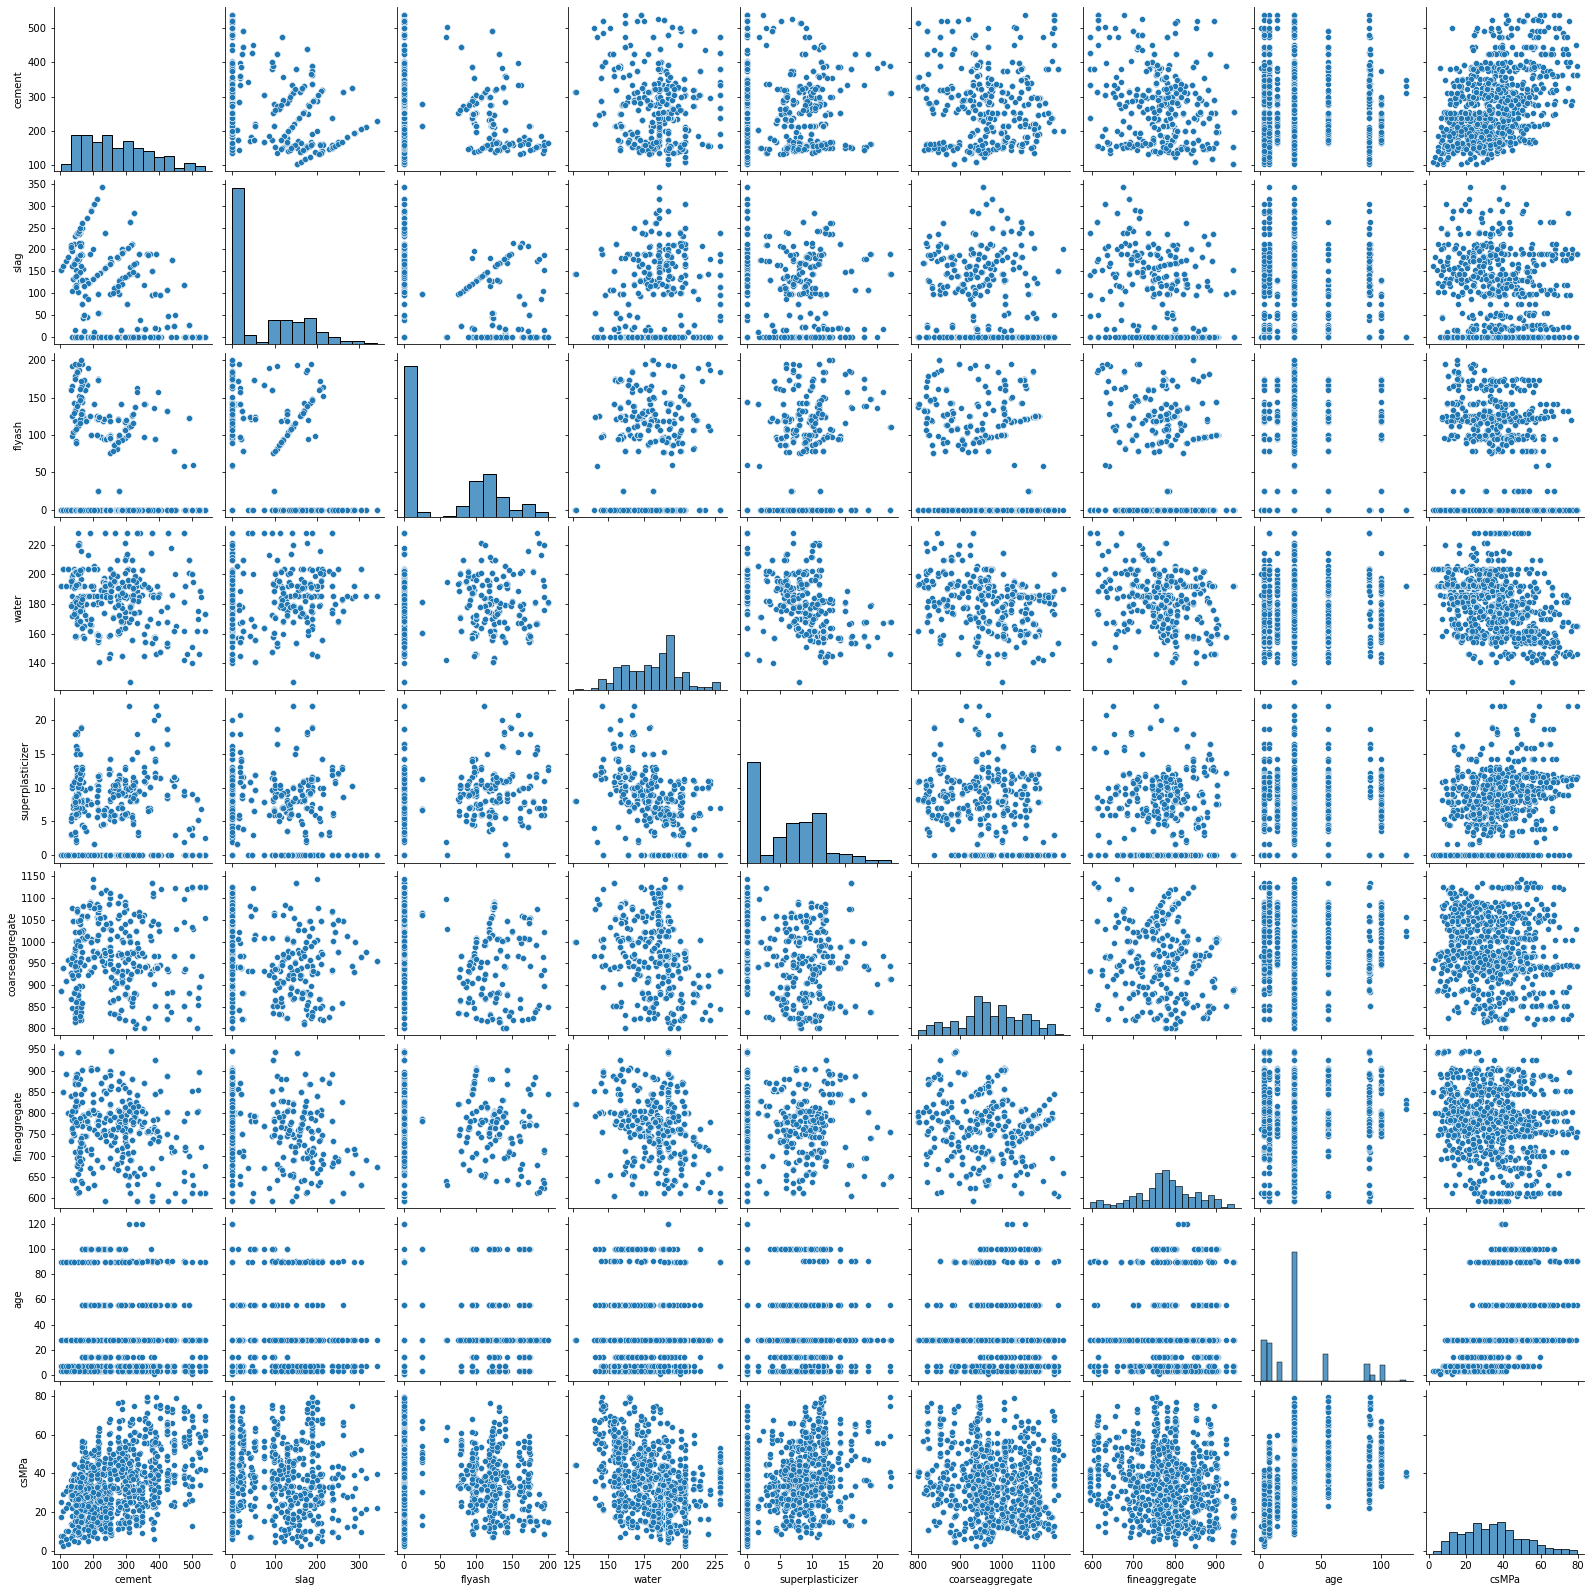

In [12]:
sns.pairplot(df)
plt.show()

### from above graphs we can say that there is no linear relation between any of variables. So, we can predict that the linear regression  model will not give good accuracy

## To check if there is a relationship between the age and csMPa variables, we can perform a chi-square analysis using the chi2_contingency() function from SciPy

In [13]:
from scipy.stats import chi2_contingency

In [14]:
stat, p, dof, expected = chi2_contingency(df['age'],df['csMPa'])
print(p)

1.0


In [15]:
X=df.drop(['csMPa'],axis=1)
Y=df['csMPa']

# Feature Scaling

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

# Splitting the data into Train and Test

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.3, random_state=4)

# Linear regression

In [19]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [20]:
reg.fit(X_train, Y_train)

LinearRegression()

In [21]:
Y_pred=reg.predict(X_test)


In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [23]:
lr_mse = mean_squared_error(Y_test, Y_pred)
lr_mae = mean_absolute_error(Y_test, Y_pred)
lr_r2 = r2_score(Y_test, Y_pred)
print("Linear Regression:")
print("MSE: ", lr_mse)
print("MAE: ", lr_mae)
print("R-squared: ", lr_r2)
print("\n")

Linear Regression:
MSE:  74.33225517537028
MAE:  6.759545500527257
R-squared:  0.7242065625693026




# Random Forest

In [24]:
from sklearn.ensemble import RandomForestRegressor

In [25]:
rf = RandomForestRegressor()

In [26]:
rf.fit(X_train, Y_train)

RandomForestRegressor()

In [27]:
rf_pred = rf.predict(X_test)


In [28]:
rf_mse = mean_squared_error(Y_test, rf_pred)
rf_mae = mean_absolute_error(Y_test, rf_pred)
rf_r2 = r2_score(Y_test, rf_pred)
print("Random Forest Regression:")
print("MSE: ", rf_mse)
print("MAE: ", rf_mae)
print("R-squared: ", rf_r2)

Random Forest Regression:
MSE:  26.23927191478157
MAE:  3.5997819047619037
R-squared:  0.9026449691324018


#  Decision Tree

In [29]:
from sklearn.tree import DecisionTreeRegressor

In [30]:
dt = DecisionTreeRegressor()

In [31]:
dt.fit(X_train, Y_train)

DecisionTreeRegressor()

In [32]:
dt_pred = dt.predict(X_test)

In [33]:
dt_mse = mean_squared_error(Y_test, dt_pred)
dt_mae = mean_absolute_error(Y_test, dt_pred)
dt_r2 = r2_score(Y_test, dt_pred)
print("Decision Tree Regression:")
print("MSE: ", dt_mse)
print("MAE: ", dt_mae)
print("R-squared: ", dt_r2)
print("\n")

Decision Tree Regression:
MSE:  57.278166617589314
MAE:  4.780041224970553
R-squared:  0.7874819965582393




# support vector regression (SVR)

In [34]:
from sklearn.svm import SVR

In [35]:
svr = SVR()

In [36]:
svr.fit(X_train, Y_train)

SVR()

In [37]:
svr_pred = svr.predict(X_test)

In [38]:
svr_mse = mean_squared_error(Y_test, svr_pred)
svr_mae = mean_absolute_error(Y_test, svr_pred)
svr_r2 = r2_score(Y_test, svr_pred)
print("support vector regression (SVR):")
print("MSE: ", svr_mse)
print("MAE: ", svr_mae)
print("R-squared: ", svr_r2)
print("\n")


support vector regression (SVR):
MSE:  82.27210986983023
MAE:  7.12527978537328
R-squared:  0.6947474830119944




Lower MSE and MAE values indicate better performance

Higher R-squared values indicate better performance, as they represent a better fit of the model to the data.

### from above results we can say that Random forest  regression model is best fitted ,is giving more accuracy

# Random Forest With Hyperparameter Tunning

# Grid SearchCV

In [39]:
# no of trees in random forest
n_estimators = [20,60,100,120]

# no of features to consider at every split
max_features = [0.2,0.6,1.0]

# max no of levels in tree
max_depth = [2,8,None]

# no of samples
max_samples = [0.5,0.75,1.0]

# 108 different random forest will be train

In [40]:
param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'max_depth':max_depth,
             'max_samples':max_samples}
print(param_grid)

{'n_estimators': [20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0]}


In [41]:
rf = RandomForestRegressor()

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
rfgrid = GridSearchCV(estimator = rf,
                     param_grid = param_grid,
                     cv=5,
                     verbose=2,
                     n_jobs=-1)

In [44]:
rfgrid.fit(X_train,Y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 60, 100, 120]},
             verbose=2)

In [45]:
rfgrid.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 120}

In [46]:
rfgrid.best_score_

0.8929686813095685

In [47]:
y_pred = rfgrid.predict(X_test)

In [48]:
r2 = r2_score(Y_test, y_pred)

In [49]:
r2

0.90374230407908

In [50]:
mse = mean_squared_error(Y_test, y_pred)
mse

25.94351657691268

### from above we can say that with hyperparameter tunning accuracy can be increased to some extent

# Polynomial Regression Model

In [51]:
from sklearn.preprocessing import PolynomialFeatures

In [52]:
poly = PolynomialFeatures(degree=2)

In [53]:
X_poly = poly.fit_transform(X_train)

In [54]:
# Train the polynomial regression model
poly_model = RandomForestRegressor()
poly_model.fit(X_poly, Y_train)

RandomForestRegressor()

In [55]:
# Use the polynomial regression model for prediction
X_test_poly = poly.fit_transform(X_test)
y_pred = poly_model.predict(X_test_poly)

In [56]:
mse = mean_squared_error(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("R-squared:", r2)

MSE: 30.11761698609726
MAE: 3.8897300471142504
R-squared: 0.8882552251883088


### We can also repeat the above code with degree=3 to train a polynomial regression model with degree 3 and compare its performance with the other models.

In [57]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)

X_poly = poly.fit_transform(X_train)

# Train the polynomial regression model
poly_model = RandomForestRegressor()
poly_model.fit(X_poly, Y_train)

# Use the polynomial regression model for prediction
X_test_poly = poly.fit_transform(X_test)
y_pred = poly_model.predict(X_test_poly)


mse = mean_squared_error(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("R-squared:", r2)

MSE: 33.813457175770345
MAE: 4.142355307925288
R-squared: 0.8745426253526158
